In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


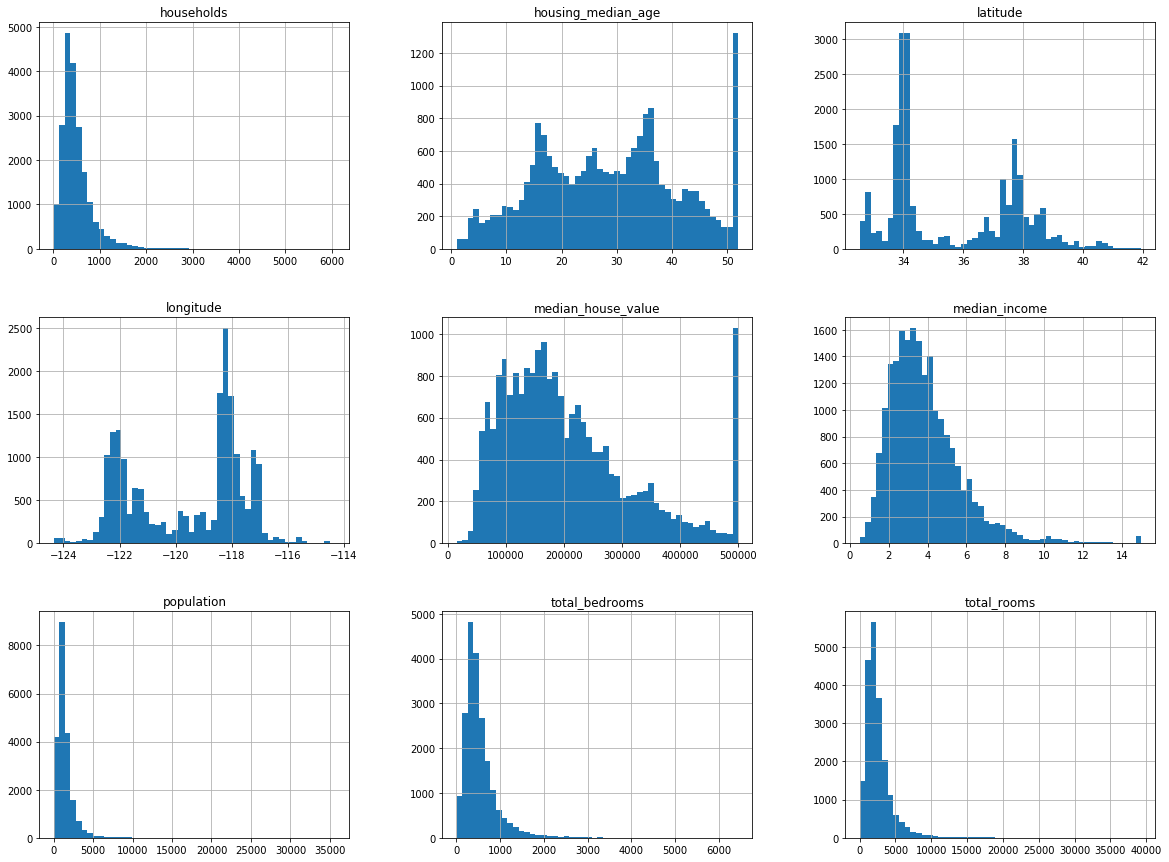

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
from zlib import crc32

In [16]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0Xffffffff < test_ratio * 2**32

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [19]:
housing_with_id['id'] = housing['longitude']*1000 + housing['latitude']
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

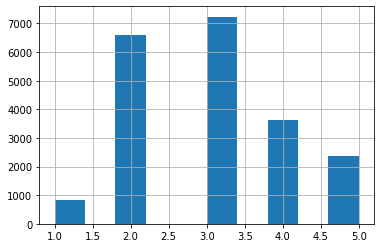

In [22]:
housing['income_cat'].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [26]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [28]:
housing = strat_train_set.copy()

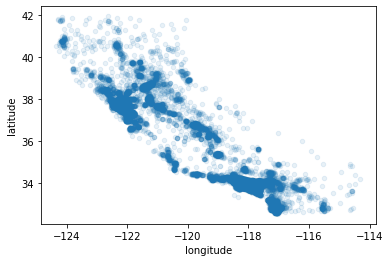

In [29]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

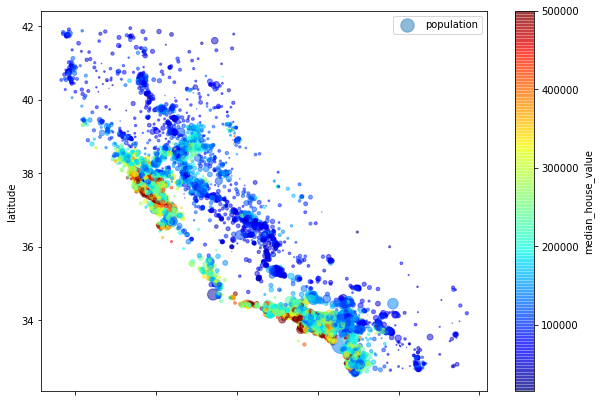

In [30]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,s=housing['population']/100,label='population',
             figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [33]:
from pandas.plotting import scatter_matrix

In [34]:
attributes=['median_house_value','median_income','total_rooms','housing_median_age','latitude']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8a75ab790>,
      dtype=object)

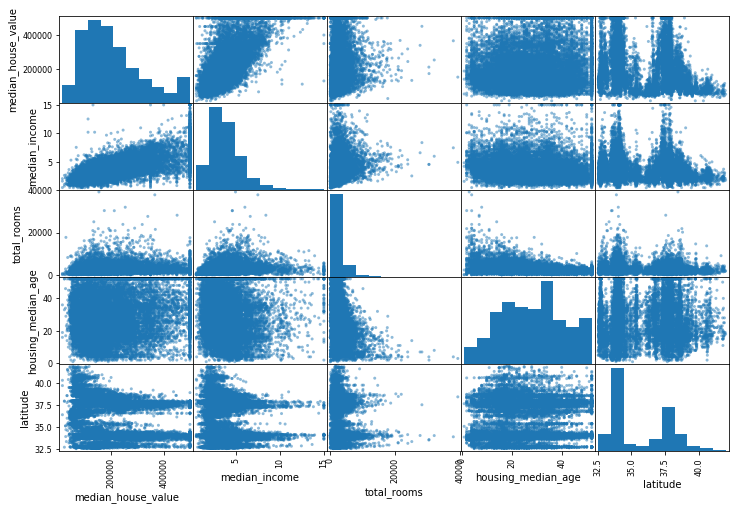

In [35]:
scatter_matrix(housing[attributes],figsize=(12,8))

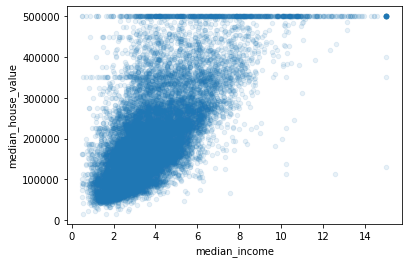

In [36]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [37]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [38]:
corr_matrix = housing.corr()

In [39]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [40]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [41]:
housing = train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy='median')

In [44]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [45]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [46]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [47]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [48]:
X = imputer.transform(housing_num)

In [49]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [50]:
housing_cat = housing[['ocean_proximity']]

In [51]:
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ordinal_encoder = OrdinalEncoder()

In [54]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [55]:
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [56]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
cat_encoder = OneHotEncoder()

In [59]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [60]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

In [64]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [66]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
    
    attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
    housing_extra_attribs=attr_adder.transform(housing.values)


In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

In [71]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [72]:
from sklearn.compose import ColumnTransformer

In [73]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [74]:
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),
                                  ('cat',OneHotEncoder(),cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lin_reg = LinearRegression()

In [77]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:', lin_reg.predict(some_data_prepared))

predictions: [212842.71869744 204346.93995355 207051.22423082 211394.73772039
 208264.22833796]


In [79]:
print('Labels:',list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
housing_predictions = lin_reg.predict(housing_prepared)

In [83]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

115610.62161702369

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [86]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_rmse)
tree_rmse

0.0

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring = 'neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Deviation:', scores.std())

In [90]:
display_scores(tree_rmse_scores)

Scores: [164693.35171171 163745.3086668  163433.77494216 166442.12980438
 165925.49290343 167325.72883297 170058.33343741 172398.37682855
 169191.62903076 162341.86081077]
Mean: 166555.5986968947
Standard Deviation: 3053.292259544886


In [92]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [93]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [109593.76776239 117338.00887239 115137.60735795 117603.17016568
 115406.28736102 118028.0825645  115080.26407372 117909.30475732
 116970.73889143 114167.65174412]
Mean: 115723.48835505196
Standard Deviation: 2421.4907499038623


In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
forest_reg = RandomForestRegressor()

In [97]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
housing_predictions = forest_reg.predict(housing_prepared)

In [100]:
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

44175.12559392842

In [104]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [105]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [106]:
display_scores(forest_rmse_scores)

Scores: [112806.27238011 119208.30726643 118498.47816237 120445.09374303
 117796.93619396 120530.68664058 118081.14997649 119181.68814691
 119203.09681282 116619.37830275]
Mean: 118237.1087625445
Standard Deviation: 2128.4198708611543


In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],
                                                                   'max_features':[2,3,4]}]

In [110]:
forest_reg=RandomForestRegressor()

In [111]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [112]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [113]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [114]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
cvres = grid_search.cv_results_

In [116]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

134942.1072168085 {'max_features': 2, 'n_estimators': 3}
123071.55623871299 {'max_features': 2, 'n_estimators': 10}
119386.95914955602 {'max_features': 2, 'n_estimators': 30}
134648.21082157528 {'max_features': 4, 'n_estimators': 3}
122973.8082353495 {'max_features': 4, 'n_estimators': 10}
119225.61556332362 {'max_features': 4, 'n_estimators': 30}
136090.66639375285 {'max_features': 6, 'n_estimators': 3}
123293.87542168445 {'max_features': 6, 'n_estimators': 10}
119500.77202736442 {'max_features': 6, 'n_estimators': 30}
135969.01349908678 {'max_features': 8, 'n_estimators': 3}
122914.28532355122 {'max_features': 8, 'n_estimators': 10}
119663.0807094726 {'max_features': 8, 'n_estimators': 30}
135431.13457852154 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
124647.39989887665 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
136134.83031090026 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
124493.39748283816 {'bootstrap': False, 'max_features': 3, 'n_es

In [117]:
feature_importances=grid_search.best_estimator_.feature_importances_

In [118]:
feature_importances

array([8.59077086e-02, 8.48659375e-02, 7.01173300e-02, 8.76981731e-02,
       8.43738871e-02, 9.28084767e-02, 8.46890738e-02, 9.76922632e-02,
       9.42586275e-02, 9.69737856e-02, 9.54399446e-02, 7.76074730e-03,
       6.97929278e-03, 3.22986534e-05, 4.34817194e-03, 6.05428157e-03])

In [119]:
extra_attribs = ['rooms_per_household','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs

In [120]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.09769226319833567, 'median_income'),
 (0.09697378561354071, 'pop_per_hhold'),
 (0.09543994458175503, 'bedrooms_per_room'),
 (0.09425862753333987, 'rooms_per_household'),
 (0.09280847670958449, 'population'),
 (0.08769817310855746, 'total_rooms'),
 (0.08590770860998417, 'longitude'),
 (0.08486593751903346, 'latitude'),
 (0.08468907377276755, 'households'),
 (0.0843738870896241, 'total_bedrooms'),
 (0.0701173300163494, 'housing_median_age'),
 (0.007760747303657756, '<1H OCEAN'),
 (0.006979292778160321, 'INLAND'),
 (0.006054281572011927, 'NEAR OCEAN'),
 (0.004348171939855317, 'NEAR BAY'),
 (3.229865344286392e-05, 'ISLAND')]

In [121]:
final_model = grid_search.best_estimator_

In [122]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [123]:
X_test_prepared = full_pipeline.transform(X_test)

In [124]:
final_predictions=final_model.predict(X_test_prepared)

In [125]:
final_mse = mean_squared_error(y_test, final_predictions)

In [128]:
final_rmse = np.sqrt(final_mse)
final_rmse

134710.44679491397

In [129]:
from scipy import stats

In [130]:
confidence=0.95

In [131]:
squared_errors = (final_predictions - y_test)**2

In [132]:
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([131595.27358046, 137755.1919989 ])